
# 🧠 **HR Analytics Visualizations (Matplotlib & Seaborn)**

### This notebook explores employee-related data and visualizes insights using Python libraries: **Pandas**, **Matplotlib**, and **Seaborn**.
### 📊 Key Visual Analyses:

- Headcount growth
- Sick leave analysis
- Employee satisfaction by department

Data source: Cleaned CSV files imported from SQL Server.

---


## 📦 Import required libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🧪 Load the HR dataset CSV files

In [13]:
employees = pd.read_csv(r"C:\Users\Maged\Desktop\Data_Analysis_SSMS_Python\data\Employees.csv")
hiring = pd.read_csv(r"C:\Users\Maged\Desktop\Data_Analysis_SSMS_Python\data\Hiring.csv")
satisfaction = pd.read_csv(r"C:\Users\Maged\Desktop\Data_Analysis_SSMS_Python\data\Satisfaction.csv")
sick_leaves = pd.read_csv(r"C:\Users\Maged\Desktop\Data_Analysis_SSMS_Python\data\SickLeaves.csv")
balances = pd.read_csv(r"C:\Users\Maged\Desktop\Data_Analysis_SSMS_Python\data\Balances.csv")

---

## 📊 1. Headcount Growth Over Time (Executive Overview Dashboard)

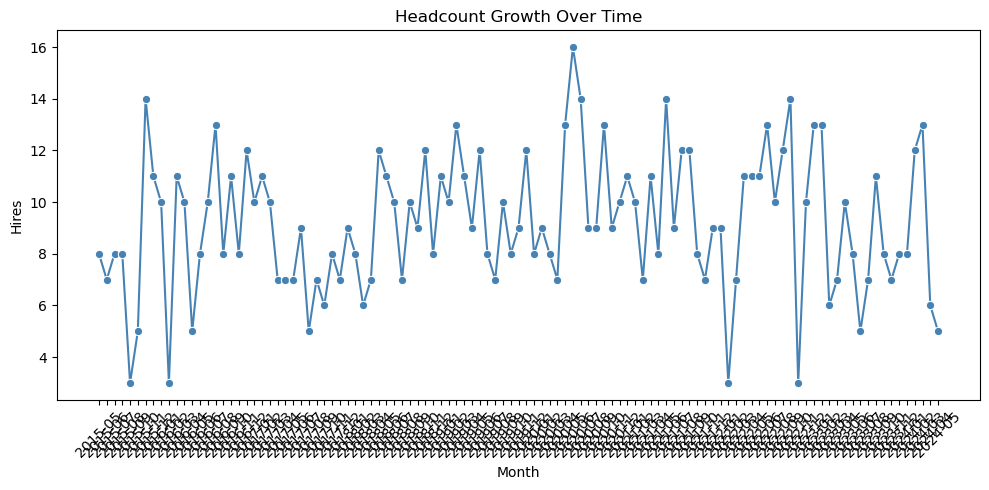

In [19]:
hiring['HiringDate'] = pd.to_datetime(hiring['HiringDate'])
hiring['Month'] = hiring['HiringDate'].dt.to_period('M').astype(str)
headcount = hiring.groupby('Month').size().reset_index(name='Hires')

plt.figure(figsize=(10, 5))
sns.lineplot(data=headcount, x='Month', y='Hires', marker='o', color='steelblue')
plt.title('Headcount Growth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📈 Explanation

This line plot shows how many employees were hired each month. It helps HR monitor company growth trends and hiring bursts over time.


---

## 📊 2. Top 10 Employees with Most Sick Days (Attendance & Leave Dashboard)

C:\Users\Maged\AppData\Local\Temp\ipykernel_5588\556666601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sick, x='EmployeeID', y='DaysOff', palette='Reds_r')


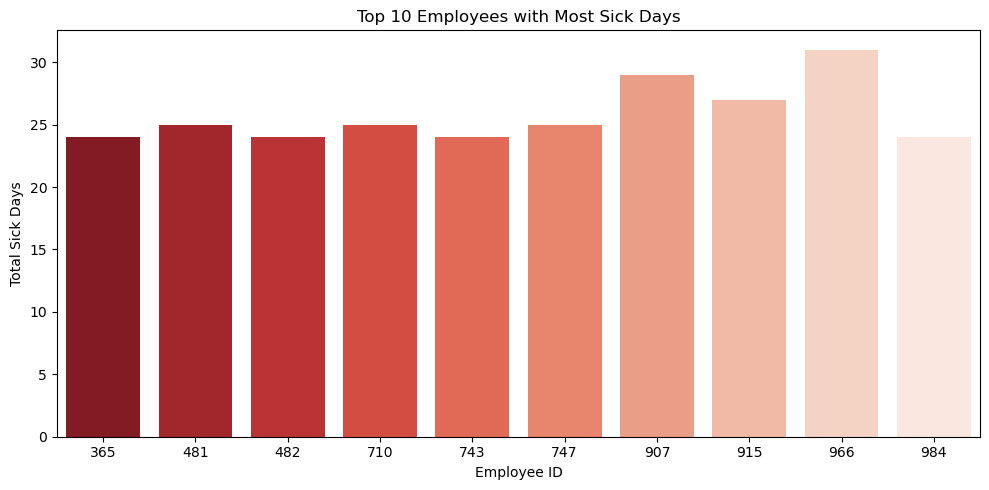

In [28]:
top_sick = sick_leaves.groupby('EmployeeID')['DaysOff'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_sick, x='EmployeeID', y='DaysOff', palette='Reds_r')
plt.title('Top 10 Employees with Most Sick Days')
plt.xlabel('Employee ID')
plt.ylabel('Total Sick Days')
plt.tight_layout()
plt.show()


### 📈 Explanation

This bar chart highlights the top 10 employees who took the most sick days. This can help HR identify employees at risk of burnout or in need of support.


---

## 📊 3. Department-Wise Satisfaction Score (Satisfaction Insights Dashboard)

C:\Users\Maged\AppData\Local\Temp\ipykernel_5588\1692146184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_satis, x='Department', y='SatisfactionScore', palette='Blues_d')


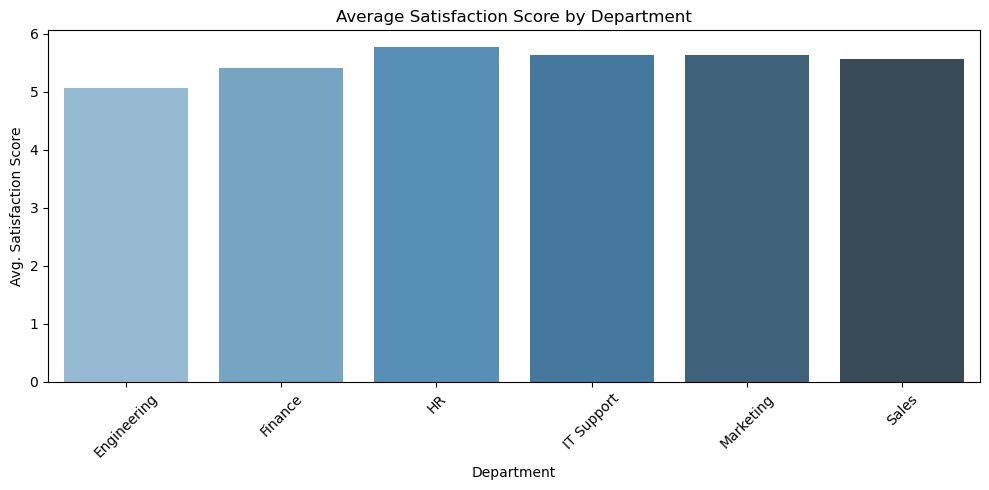

In [32]:
merged_satisfaction = pd.merge(satisfaction, employees, on='EmployeeID')
dept_satis = merged_satisfaction.groupby('Department')['SatisfactionScore'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=dept_satis, x='Department', y='SatisfactionScore', palette='Blues_d')
plt.title('Average Satisfaction Score by Department')
plt.ylabel('Avg. Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📈 Explanation
This bar plot shows which departments have higher or lower satisfaction scores. It provides insight into team morale and engagement across the organization.

---

## 📅 4. Heatmap of Sick Leaves by Month and Day (Attendance & Leave Dashboard)

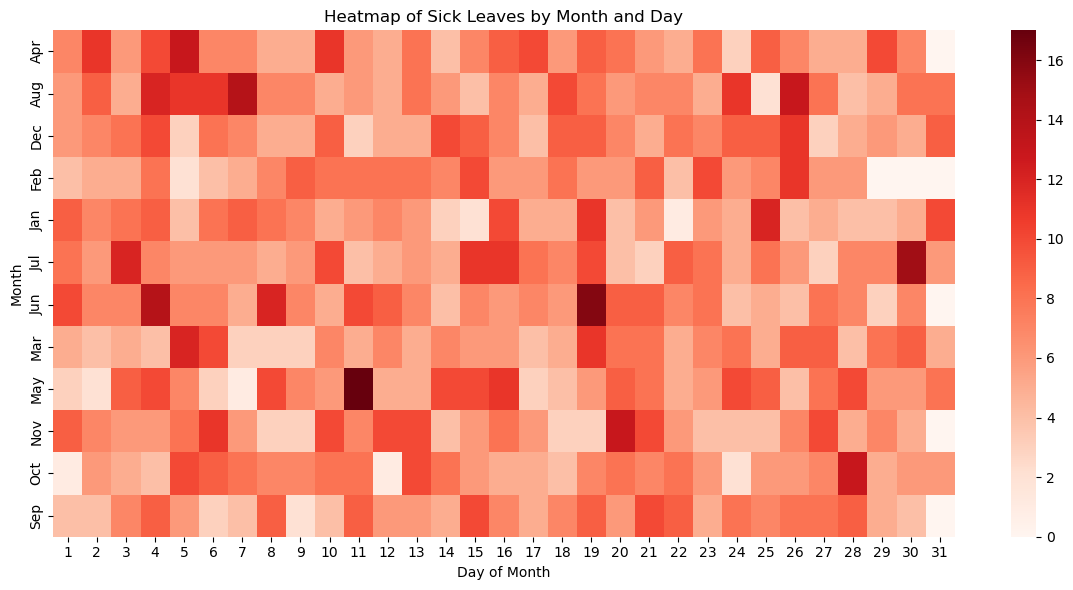

In [38]:
sick_leaves['LeaveDate'] = pd.to_datetime(sick_leaves['LeaveDate'])
sick_leaves['Month'] = sick_leaves['LeaveDate'].dt.strftime('%b')
sick_leaves['Day'] = sick_leaves['LeaveDate'].dt.day

heatmap_data = sick_leaves.groupby(['Month', 'Day']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Heatmap of Sick Leaves by Month and Day')
plt.ylabel('Month')
plt.xlabel('Day of Month')
plt.tight_layout()
plt.show()


### 📅 Explanation

This heatmap reveals seasonal or monthly sick leave patterns, helping HR to anticipate and manage workforce availability.


---

## 📊 5. Satisfaction Score Distribution (Satisfaction Insights Dashboard)

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=satisfaction, x='SatisfactionScore', bins=10, kde=True, color='skyblue')
plt.title('📊 Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score (1–10)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


### 📊 Explanation

This histogram helps identify the spread and concentration of employee satisfaction ratings, allowing quick detection of morale dips.


---

## 🚦6. Leave Balance Risk Categories (Leave Balances Dashboard)

C:\Users\Maged\AppData\Local\Temp\ipykernel_5588\2189373766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_counts, x='Category', y='Count', palette='Set2')


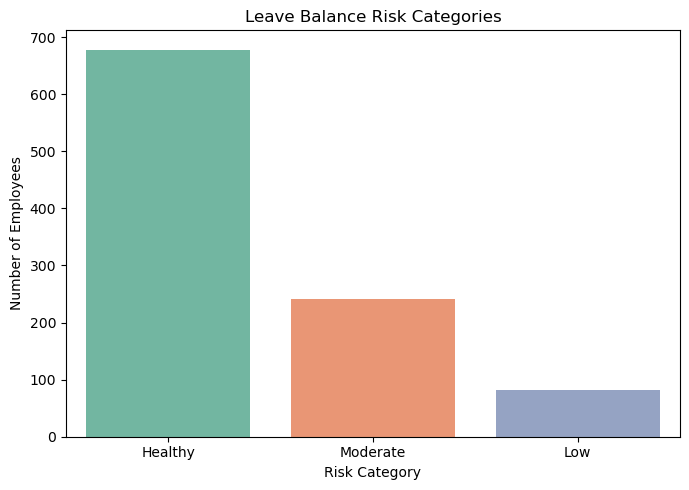

In [46]:
def risk_category(row):
    if row['AnnualLeaveBalance'] < 3:
        return 'Low'
    elif row['AnnualLeaveBalance'] < 10:
        return 'Moderate'
    else:
        return 'Healthy'

balances['RiskCategory'] = balances.apply(risk_category, axis=1)
risk_counts = balances['RiskCategory'].value_counts().reset_index()
risk_counts.columns = ['Category', 'Count']

plt.figure(figsize=(7, 5))
sns.barplot(data=risk_counts, x='Category', y='Count', palette='Set2')
plt.title('Leave Balance Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


### 🚦 Explanation

This bar chart shows the distribution of employees based on their annual leave risk. It helps HR prevent burnout and enforce leave policies.

---